In [3]:
# !pip install pycaret

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# from pycaret.utils import enable_colab
# enable_colab()

In [6]:
# !pip install pingouin
from pycaret.datasets import get_data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu
# import pingouin as pg

In [7]:
# #!pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [8]:
# link = 'https://drive.google.com/file/d/1EQWlNJYEis0AfgNejcp_8fFVCDMMdrwE/view?usp=sharing'
# fluff, id = link.split('=')
# print (id) # Verify that you have everything after '='

In [9]:
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('Filename.csv')  
# df3 = pd.read_csv('Filename.csv')
# # Dataset is now stored in a Pandas Dataframe


In [10]:
url = 'https://media.githubusercontent.com/media/maryclarecc/project4/main/2016-2017%20Excel%20(final%20version).csv'
df = pd.read_csv(url)
df2 = df.replace("#NULL!", 0)
# df.head()
# df.tail()
df2 = df2.drop(["schoolnum"], axis = 1)
# dfconf.head()

/var/folders/08/k5qj0k9j1dbgppb_7vzc5rnm0000gn/T/ipykernel_40089/4185617086.py:2: DtypeWarning: Columns (2,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [9]:
# notarg = dfconf.drop(["dx_dep1"], axis=1)
# notarg.head()

In [10]:
# NEW PROCESSING -- Categorical "#NULL!" to NaN
# df.loc[ df["sex_birth"] == "#NULL!", "sex_birth"] = np.nan
# df.loc[ df["gender"] == "#NULL!", "gender"] = np.nan
# df.loc[ df["sexual"] == "#NULL!", "sexual"] = np.nan
# df.loc[ df["relship"] == "#NULL!", "relship"] = np.nan
# df.loc[ df["schoolnum"] == "#NULL!", "schoolnum"] = np.nan
# df.loc[ df["age"] == "#NULL!", "age"] = np.nan


In [11]:
# NEW PROCESSING -- Categorical NaN replace with blank ""
# c = df.select_dtypes(np.number).columns
# df[c] = df[c].fillna(0)
# df = df.fillna("")
# df.tail()

In [11]:
df3 = df2.apply(pd.to_numeric)
# df3.dtypes.tolist()

In [12]:
df3['height_total'] = df3['height_ft']*12 + df3['height_in']
df3 = df3.loc[df3["wgt_lbs"] < 401,:] 
df3 = df3.loc[df3["height_total"] < 80,:] 
df3["bmi"] = df3["wgt_lbs"] / df3['height_total']**2 * 703
df3.shape

(52525, 480)

In [13]:
df3.head()

,age,sex_birth,gender,sexual,relship,race_black,race_ainaan,race_asian,race_his_temp,race_pi,...,sch_UNCG,dx_dep1,dx_anx,dx_attl,dx_ea1,dx_psy1,dx_pers,dx_sa1,height_total,bmi
0,20.0,1,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,60.0,25.386111
1,21.0,1,2,1,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,62.0,21.031478
2,35.0,1,2,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,62.0,35.296306
3,22.0,2,1,1,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,68.0,22.044766
4,19.0,2,1,1,6,0,0,0,0,0,...,0,0,0,1,0,0,0,0,72.0,26.443866


In [14]:
# df3["wgt_lbs"].sort_values(ascending=False).head(100)

In [15]:
# df3["height_total"].sort_values(ascending=False).head(100)

In [14]:
df4 = df3.drop(["wgt_lbs", "height_ft", "height_in", "height_total"], axis = 1)
dfclean = df4.loc[df4["bmi"] > 10] 
dfclean = dfclean.loc[dfclean["bmi"] < 50]
dfclean.shape
dfclean.head()

,age,sex_birth,gender,sexual,relship,race_black,race_ainaan,race_asian,race_his_temp,race_pi,...,sch_RhodeIslandCollege,sch_UNCG,dx_dep1,dx_anx,dx_attl,dx_ea1,dx_psy1,dx_pers,dx_sa1,bmi
0,20.0,1,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25.386111
1,21.0,1,2,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,21.031478
2,35.0,1,2,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35.296306
3,22.0,2,1,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,22.044766
4,19.0,2,1,1,6,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,26.443866


In [15]:
dfclean.shape

(47288, 476)

In [17]:
notarg = dfclean.drop(["dx_dep1"], axis=1)
notarg.shape

(47288, 475)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [19]:
# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the data.
df_pca = pca.fit_transform(notarg)

pcaArray = (abs(pca.components_))

In [20]:
pcaDF = pd.DataFrame(pcaArray)
# pcaDF.to_csv("pcaDF.csv")

# return the transpose
result = pcaDF.transpose()
result.shape
pcaDF.shape

(2, 475)

In [21]:
col = []
length = len(notarg.columns)

for i in range(0,length):
    name = notarg.columns[i]
    col.append(name)

result['Variables'] = col

# pd.set_option('display.max_rows', None)
result.sort_values(by=[0], ascending=False).head(10)


,0,1,Variables
16,0.990341,0.001413,hours_work_paid
0,0.101185,0.075204,age
474,0.044306,0.049945,bmi
58,0.026490,0.002090,residenc
55,0.019618,0.001331,timeclass
295,0.017209,0.007900,BRS_1
297,0.015394,0.006874,BRS_3
299,0.015217,0.008027,BRS_5
262,0.014814,0.021784,belong8
18,0.014793,0.007128,educ_par2


In [22]:
dffinal = dfclean[["hours_work_paid", "age", "bmi", "residenc", "timeclass", "BRS_1", "BRS_3", "BRS_5", "belong8", "educ_par2", "dx_dep1"]]


In [18]:
data = dfclean.sample(frac=0.95, random_state=786)
data_unseen = dfclean.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
data_unseen = dfclean.drop(["dx_dep1"], axis=1)
data_unseen

,age,sex_birth,gender,sexual,relship,race_black,race_ainaan,race_asian,race_his_temp,race_pi,...,sch_PennState,sch_RhodeIslandCollege,sch_UNCG,dx_anx,dx_attl,dx_ea1,dx_psy1,dx_pers,dx_sa1,bmi
0,20.0,1,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25.386111
1,21.0,1,2,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,21.031478
2,35.0,1,2,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35.296306
3,22.0,2,1,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,22.044766
4,19.0,2,1,1,6,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,26.443866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52613,35.0,1,2,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18.792604
52614,20.0,1,2,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45.188246
52615,18.0,1,2,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24.199951
52616,18.0,2,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33.223062


In [45]:
data.to_csv('data.csv',index=False)

In [24]:
# dffinal.to_csv("dffinal.csv")

In [25]:
pca.explained_variance_ratio_

array([0.40184374, 0.13570044])

In [26]:
# plt.scatter(data = dfclean, x = "dx_dep1", y ="flourish")

In [27]:
dfclean.groupby('dx_dep1')['flourish'].mean()


dx_dep1
0    44.965719
1    40.451359
Name: flourish, dtype: float64

In [28]:
dfclean.groupby('dx_dep1')['bmi'].mean()

dx_dep1
0    24.778282
1    26.130649
Name: bmi, dtype: float64

In [29]:
# gbdf = df3.groupby('dx_dep1')
# gbdf2 = pd.DataFrame(gbdf).mean()
# gbdf2

In [30]:
# dep1 = df3["dx_dep1"]== "1"
# dep0 = df3["dx_dep1"] == "0"
# dep1

dep1wt = dfclean.loc[dfclean["dx_dep1"] == 1, :].bmi
dep0wt = dfclean.loc[dfclean["dx_dep1"] == 0, :].bmi

dep1fl = dfclean.loc[dfclean["dx_dep1"] == 1, :].flourish
dep0fl = dfclean.loc[dfclean["dx_dep1"] == 0, :].flourish

dep1hrs = dfclean.loc[dfclean["dx_dep1"] == 1, :].hours_work_paid
dep0hrs = dfclean.loc[dfclean["dx_dep1"] == 0, :].hours_work_paid

In [31]:
# compare samples
stat, p = mannwhitneyu(dep1wt, dep0wt)
print('Statistics=%.3f, BMI p=%.3f' % (stat, p))

Statistics=167980491.000, BMI p=0.000


In [32]:
stat, p = mannwhitneyu(dep1fl, dep0fl)
print('Statistics=%.3f, Flourish p=%.3f' % (stat, p))

Statistics=129312261.000, Flourish p=0.000


In [33]:
stat, p = mannwhitneyu(dep1hrs, dep0hrs)
print('Statistics=%.3f, Hours Worked p=%.3f' % (stat, p))

Statistics=181259688.000, Hours Worked p=0.000


In [19]:
from pycaret.classification import *
regr = setup(data = data, target = 'dx_dep1', session_id=123,
                  normalize = True, 
                  silent = True,
                  data_split_stratify = True,
                  fix_imbalance = True,
                  transformation = True, 
                  ignore_low_variance = True,
                  feature_selection = True,
                  feature_selection_threshold = 0.05,
                  bin_numeric_features = ["hours_work_paid", "age", "bmi"],
                  high_cardinality_features = ["residenc", "timeclass", "BRS_1", "BRS_3", "BRS_5", "belong8", "educ_par2"],
                  remove_multicollinearity = True, multicollinearity_threshold = 0.65) 

,Description,Value
0,session_id,123
1,Target,dx_dep1
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(44924, 476)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,467
8,Ordinal Features,False
9,High Cardinality Features,True


In [88]:
data.head()

,age,sex_birth,gender,sexual,relship,race_black,race_ainaan,race_asian,race_his_temp,race_pi,...,sch_RhodeIslandCollege,sch_UNCG,dx_dep1,dx_anx,dx_attl,dx_ea1,dx_psy1,dx_pers,dx_sa1,bmi
0,23.0,1,2,4,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,19.004109
1,27.0,1,2,1,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,22.312012
2,27.0,1,2,1,2,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,21.141680
3,19.0,1,2,4,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23.490755
4,22.0,1,2,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18.879395


In [ ]:
best = compare_models()

In [20]:
lr = create_model('lr', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8652,0.9389,0.8692,0.6416,0.7383,0.6502,0.6638
1,0.8658,0.9363,0.8430,0.6488,0.7332,0.6456,0.6555
2,0.8671,0.9376,0.8517,0.6497,0.7371,0.6503,0.6610
3,0.8623,0.9344,0.8401,0.6415,0.7275,0.6376,0.6480
4,0.8610,0.9339,0.8488,0.6369,0.7277,0.6370,0.6488
5,0.8747,0.9459,0.8924,0.6574,0.7571,0.6753,0.6896
6,0.8620,0.9383,0.8559,0.6371,0.7304,0.6403,0.6529
7,0.8690,0.9344,0.8530,0.6533,0.7399,0.6544,0.6648
8,0.8693,0.9357,0.8474,0.6558,0.7394,0.6540,0.6636


In [21]:
rf = create_model('rf', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8928,0.9390,0.7602,0.7525,0.7563,0.6877,0.6877
1,0.8909,0.9349,0.7282,0.7626,0.7450,0.6757,0.6760
2,0.8954,0.9428,0.7456,0.7691,0.7572,0.6905,0.6907
3,0.8884,0.9375,0.7398,0.7474,0.7436,0.6723,0.6723
4,0.8941,0.9406,0.7471,0.7637,0.7553,0.6878,0.6878
5,0.8960,0.9446,0.7631,0.7620,0.7625,0.6960,0.6960
6,0.8896,0.9410,0.7380,0.7522,0.7450,0.6746,0.6747
7,0.8845,0.9334,0.7191,0.7440,0.7313,0.6578,0.6580
8,0.8823,0.9379,0.7151,0.7387,0.7267,0.6518,0.6519


In [22]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8665,0.9389,0.8706,0.6441,0.7404,0.6532,0.6667
1,0.8649,0.9362,0.8401,0.6473,0.7312,0.6429,0.6527
2,0.8671,0.9382,0.8547,0.6490,0.7378,0.6510,0.6620
3,0.8620,0.9347,0.8387,0.6411,0.7267,0.6366,0.6469
4,0.8614,0.9343,0.8459,0.6382,0.7275,0.6370,0.6483
5,0.8760,0.9462,0.8953,0.6595,0.7596,0.6786,0.6930
6,0.8626,0.9386,0.8574,0.6381,0.7317,0.6420,0.6546
7,0.8696,0.9345,0.8544,0.6544,0.7412,0.6560,0.6665
8,0.8699,0.9359,0.8459,0.6576,0.7400,0.6550,0.6643


In [23]:
boosted_lr = ensemble_model(tuned_lr,method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8270,0.8937,0.8154,0.5736,0.6735,0.5606,0.5767
1,0.8200,0.8915,0.7762,0.5645,0.6536,0.5361,0.5485
2,0.8315,0.9009,0.8067,0.5830,0.6768,0.5668,0.5805
3,0.8280,0.8986,0.8096,0.5760,0.6731,0.5608,0.5758
4,0.8347,0.9034,0.8328,0.5859,0.6879,0.5800,0.5966
5,0.8378,0.9113,0.8343,0.5918,0.6924,0.5866,0.6025
6,0.8241,0.9061,0.8020,0.5692,0.6659,0.5511,0.5660
7,0.8206,0.8909,0.7817,0.5647,0.6557,0.5386,0.5516
8,0.8286,0.9034,0.8052,0.5777,0.6727,0.5608,0.5750


In [93]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

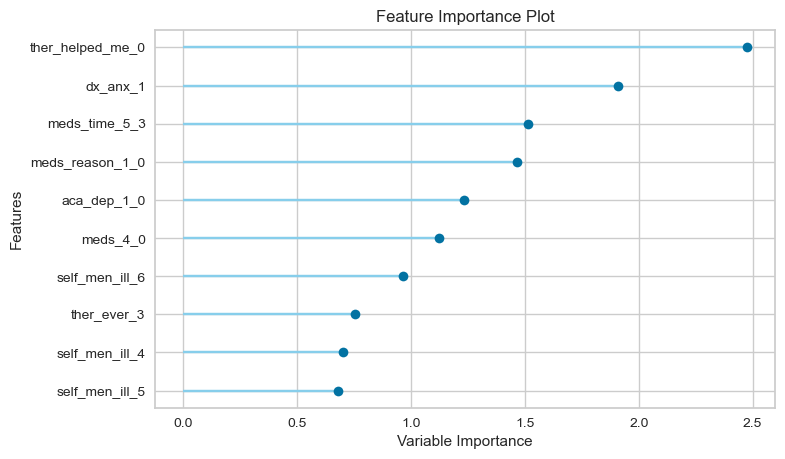

In [26]:
plot_model(lr, plot = 'feature')

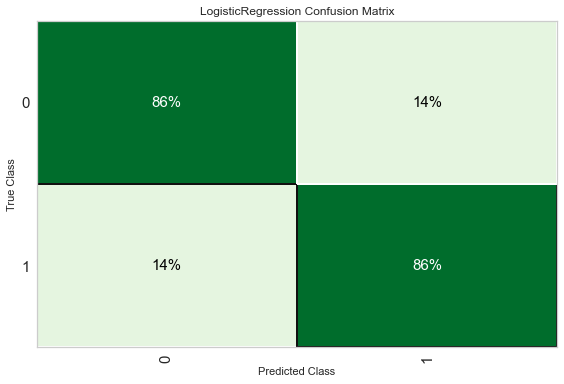

In [24]:
plot_model(lr, plot = 'confusion_matrix',plot_kwargs={'percent':True})

In [58]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

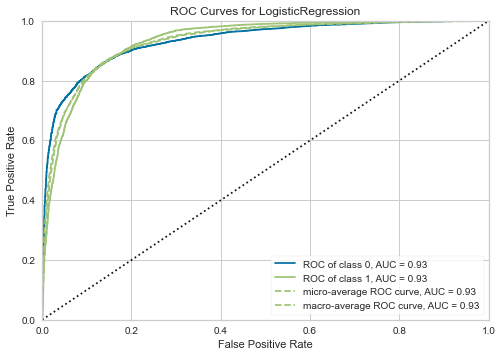

In [25]:
plot_model(lr, plot = 'auc')

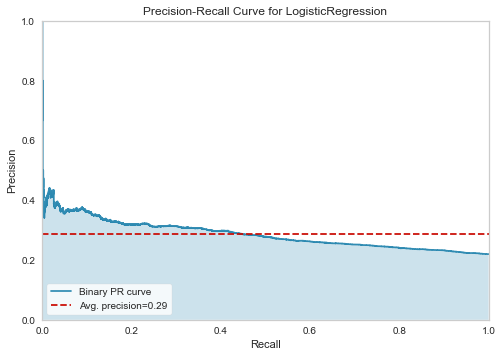

In [51]:
plot_model(lr, plot = 'pr')

In [52]:
predictions = predict_model(lr, data=data_unseen)
predictions.head()

,hours_work_paid,age,bmi,residenc,timeclass,BRS_1,BRS_3,BRS_5,belong8,educ_par2,Label,Score
0,0.0,20.0,25.386111,6,2,0,0,0,0,8,0,0.6518
1,0.0,21.0,21.031478,5,6,0,0,0,0,6,0,0.5489
2,50.0,35.0,35.296306,5,1,0,0,0,0,6,1,0.5325
3,0.0,22.0,22.044766,5,6,0,0,0,0,7,0,0.5876
4,20.0,19.0,26.443866,2,4,0,0,0,0,4,0,0.6135


In [42]:
save_model(lr, 'log_regr_pipeline_v2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='dx_dep1',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                        target_variable='dx_dep1',
                                        threshold=0.9)),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_

In [44]:
predicts = ["4", "22", "22", "1", "1","1","1","1","1","1"]
final = np.array(predicts)
cols = ["hours_work_paid", "age", "bmi", "residenc", "timeclass", "BRS_1", "BRS_3", "BRS_5", "belong8", "educ_par2"]

data_unseen2 = pd.DataFrame([final], columns = cols)
prediction = predict_model(lr, data=data_unseen2, round = 0)
prediction = prediction.Score[0]
prediction

1.0

In [59]:
save_model(rf, 'rf_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='dx_dep1',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l